In [1]:
#import required libraries.

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [4]:
#import the dataset : fashion mnist dataset

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
#DATA PREPROCESSING

#Reduced the size of train n test image so we can feed into the neural network.
train_images = train_images / 255

test_images = test_images / 255

In [9]:
#Building Model

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)), #input layer
    keras.layers.Dense(128, activation = 'relu'), #hidden layer
    keras.layers.Dense(10, activation = 'softmax') #output layer
])

In [11]:
#Compiling Model

model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [12]:
#Training Model

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5478 - accuracy: 0.5195
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8593 - accuracy: 0.7089
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7039 - accuracy: 0.7460
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6397 - accuracy: 0.7643
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5990 - accuracy: 0.7815
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5685 - accuracy: 0.7938
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5443 - accuracy: 0.8049
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5251 - accuracy: 0.8126
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5096 - accuracy: 0.8194
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.49

In [13]:
#Evaluating Model

test_loss, test_accu = model.evaluate(test_images, test_labels, verbose = 1)
print('Model Accuracy', test_accu * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.5144 - accuracy: 0.8120
Model Accuracy 81.19999766349792


313/313 [==============================] - 1s 2ms/step
Enter Prediction :26
Coat


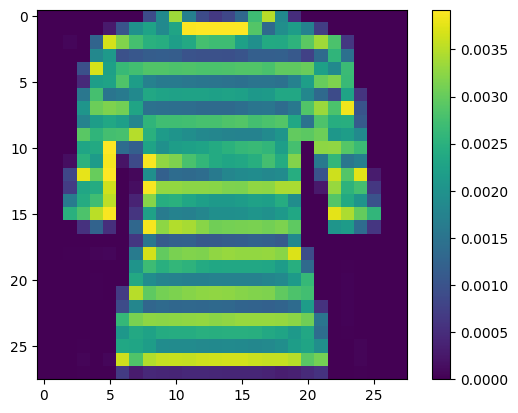

In [14]:
#Predicting Output

predict = model.predict(test_images)

enter_fashion = int(input('Enter Prediction :'))
print(class_names[np.argmax(predict[enter_fashion])])


plt.figure()
plt.imshow(train_images[enter_fashion])
plt.colorbar()
plt.show()